### 분류 - KNN
- 가장 간단한 머신러닝 분류 학습 알고리즘
- 모델 관련 패턴식 없음 => 데이터 마다 거리계산
- 거리기반 모델
- 하이퍼 파라미터: k: 최근접 이웃 데이터의 수
- 적용학습: 회귀, 분류 모두 가능

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [9]:
X = [[1],[2],[3],[4],[5]]
y = [0,1,1,1,0]
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

In [17]:
knn.predict([[1]])
knn.predict_proba([[1]])

array([[0.4, 0.6]])

#### 최적의 k 찾기


In [11]:
for _k in range(1,6):
    knn.n_neighbors = _k
    knn.fit(X,y)
    print(f'{_k}: {knn.score(X,y)}')


1: 1.0
2: 0.8
3: 0.6
4: 0.6
5: 0.6


In [18]:
X = [[1],[2],[3],[4],[5],[6],[7],[8],[9]]
y = [0,1,1,0,1,1,0,1,1]
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

In [25]:
knn.predict_proba([[5]])

array([[0.4, 0.6]])

### KNN 실습
- 데이터 student_info.csv

##### 데이터 분석 & 목적
- 데이터 구성 => 방법? 지도/비지도
- 데이터 목적 => 결과/타겟/종속변수 => 수치형: 회귀, 범주형 분류
- 학습 방법 => 해당하는 학습방법 확인 => all_Estimator

#### [1]데이터 준비
- 데이터로딩

#### [2]데이터 전처리
- 데이터 정제: 결측치, 중복값, 이상치, 모순값 확인 및 처리
- 데이터 표준화: 단위, 자료형
- 데이터 정규화: 수치값=> 값의 범위를 일치시킴.: 통일 --> 스케일러
    *범주형/글자 =>OrdinalEncoder, OneHotEncoder, LabelEncoder(y)
    

#### [3]학습용 데이터 준비 ==> 학습용, 테스트용, 검증용
- 분류 => 항목비율
 * 데이터 추가
 * 업샘플링/다운샘플링
 * API매개변수에 비율조정한 매겨변수 체크(stratify = 타겟)

#### [4]학습 모델 객체 생성 및 학습 진행

#### [5] 예측 및 평가

In [225]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
stdf = pd.read_csv('../dataset/student_info.csv')
stdf.head()

,no,gender,weight_kg,height_cm
0,1,m,98,198
1,2,m,77,170
2,3,m,70,170
3,4,m,90,198
4,5,m,71,170


In [226]:
stdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no         90 non-null     int64 
 1   gender     90 non-null     object
 2   weight_kg  90 non-null     int64 
 3   height_cm  90 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.9+ KB


In [227]:
stdf.isnull().sum()
stdf.drop(columns=['gender','no'], axis=1, inplace=True)

In [228]:
bmi= round(stdf.weight_kg/((stdf.height_cm/100)**2),2)
bins = [0,23,35,max(bmi)]
label = [0,1,2]
bmi = pd.cut(bmi,bins, labels=label)
stdf['bmi'] = bmi
stdf['bmi']

0     1
1     1
2     1
3     0
4     1
     ..
85    1
86    0
87    0
88    1
89    1
Name: bmi, Length: 90, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [229]:
#데이터 타켓 라벨클래스 분리
mmt = MinMaxScaler(feature_range=(0, 1))
mmt_data = mmt.fit_transform(stdf)

ss = StandardScaler()
ss_data = ss.fit_transform(stdf)

In [230]:
stdf_data = stdf[stdf.columns[:-1]]
stdf_target = stdf[stdf.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(stdf_data, stdf_target, test_size=0.2,random_state=160,stratify=stdf_target)
KNN= KNeighborsClassifier(n_neighbors=4)
model = KNN.fit(X_train,y_train)
len(X_train)
KNN.score(X_test,y_test)

0.8888888888888888

n_neighbors = 1: 0.89
0.8888888888888888
n_neighbors = 2: 0.89
0.8888888888888888
n_neighbors = 3: 1.0
1.0
n_neighbors = 4: 0.89
0.8888888888888888
n_neighbors = 5: 1.0
1.0
n_neighbors = 6: 0.94
0.9444444444444444
n_neighbors = 7: 0.94
0.9444444444444444
n_neighbors = 8: 0.94
0.9444444444444444
n_neighbors = 9: 0.94
0.9444444444444444
n_neighbors = 10: 0.94
0.9444444444444444
n_neighbors = 11: 1.0
1.0
n_neighbors = 12: 0.94
0.9444444444444444
n_neighbors = 13: 0.94
0.9444444444444444
n_neighbors = 14: 0.94
0.9444444444444444
n_neighbors = 15: 0.94
0.9444444444444444
n_neighbors = 16: 0.83
0.8333333333333334
n_neighbors = 17: 0.83
0.8333333333333334
n_neighbors = 18: 0.83
0.8333333333333334
n_neighbors = 19: 0.83
0.8333333333333334
n_neighbors = 20: 0.83
0.8333333333333334
n_neighbors = 21: 0.78
0.7777777777777778
n_neighbors = 22: 0.83
0.8333333333333334
n_neighbors = 23: 0.78
0.7777777777777778
n_neighbors = 24: 0.78
0.7777777777777778
n_neighbors = 25: 0.78
0.7777777777777778
n_neigh

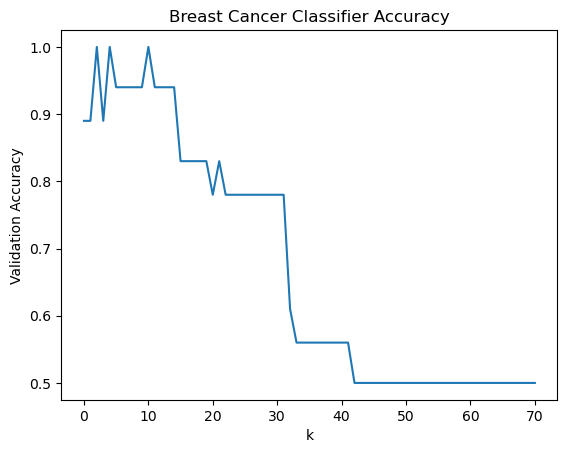

In [236]:
accuracy = []
k_list= range(1,71)

for i in range(1,X_train.shape[0]):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    print(f'n_neighbors = {i}: {round(KNN.score(X_test, y_test),2)}')
    accuracy.append(round(KNN.score(X_test, y_test),2))
    y_pred=KNN.predict(X_test)
    accuracy_score_ = accuracy_score(y_test, y_pred)
    print(accuracy_score_)
plt.plot(accuracy)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()


In [237]:
y_pred=KNN.predict(X_test)
accuracy_score_ = accuracy_score(y_test, y_pred)
accuracy_score_


0.5

#### [6]결과
- 성능 만족스럽지 않음 ==> 튜닝 하이퍼파라미터
- 성능 만족 ==> 모델 저장

In [238]:
from sklearn.model_selection import GridSearchCV


In [241]:
#하이퍼 파라미터  n_neighbors
model = KNeighborsClassifier()
param_grid = {'n_neighbors': [i for i in range(1,30)], 'weights': ['uniform', 'distance'], 'p':[1,2]}
GScv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5,refit=True)
GScv.fit(X_train, y_train)
GScv

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [248]:
gscv_df= pd.DataFrame(GScv.cv_results_)
gscv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002407,0.000797,0.002250,0.000973,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.933333,0.733333,0.857143,1.000000,1.000000,0.904762,0.100610,18
1,0.001799,0.000399,0.001600,0.000490,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.933333,0.733333,0.857143,1.000000,1.000000,0.904762,0.100610,18
2,0.001801,0.000747,0.002199,0.000400,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.933333,0.666667,0.928571,1.000000,1.000000,0.905714,0.123457,15
3,0.001403,0.000494,0.000998,0.000004,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.933333,0.666667,0.928571,1.000000,1.000000,0.905714,0.123457,15
4,0.001203,0.000407,0.001402,0.000799,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.933333,0.733333,0.857143,0.928571,1.000000,0.890476,0.090651,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.001000,0.000635,0.001686,0.000594,28,2,distance,"{'n_neighbors': 28, 'p': 2, 'weights': 'distan...",0.933333,0.733333,0.857143,0.928571,0.928571,0.876190,0.076842,48
112,0.000996,0.000004,0.001400,0.000486,29,1,uniform,"{'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}",0.466667,0.533333,0.571429,0.571429,0.428571,0.514286,0.057459,116
113,0.001003,0.000010,0.001199,0.000407,29,1,distance,"{'n_neighbors': 29, 'p': 1, 'weights': 'distan...",0.933333,0.733333,0.857143,0.928571,0.928571,0.876190,0.076842,48
114,0.001020,0.000046,0.001394,0.000483,29,2,uniform,"{'n_neighbors': 29, 'p': 2, 'weights': 'uniform'}",0.533333,0.533333,0.642857,0.642857,0.500000,0.570476,0.060339,115


In [250]:
print(f'하이퍼 파라미터: {GScv.best_params_},점수{round(GScv.best_score_,2)}')

하이퍼 파라미터: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'},점수0.93


### 회귀 Regression -knn 방식
- 분류의 경우 predcit_proba로 return
- 회귀의 경우 평균값을 return
- KNeighborsClassifier()알고리즘 사용
- ex)키를 통해 몸무게 예측

In [319]:
STDF = pd.read_csv('../dataset/student_info.csv')
STDF['gender'] = STDF['gender'].astype('category')
STDF.drop(['no'],axis=1,inplace=True)
STDF

,gender,weight_kg,height_cm
0,m,98,198
1,m,77,170
2,m,70,170
3,m,90,198
4,m,71,170
...,...,...,...
85,f,100,190
86,f,54,163
87,f,57,161
88,f,101,198


In [325]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
stdf_data = STDF[STDF.columns[2]]
stdf_target = np.array(STDF[STDF.columns[1]]).reshape(-1,1)
stdf_data
X_train, X_test, y_train, y_test = train_test_split(stdf_target, stdf_data, test_size=0.2, random_state=5)
len(X_train)
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)
print(f'{KNR.score(X_test, y_test):.2f}')
y_pred = KNR.predict(X_test)


-0.24


In [321]:
print('k = ',KNR.n_neighbors)
print(KNR.kneighbors([[170.0]]))
#이걸 평균한 값
print(KNR.predict([[170.0]]))

k =  5
(array([[60., 60., 69., 70., 72.]]), array([[50,  7, 35,  0, 16]], dtype=int64))
[188.2]


In [326]:
from sklearn.model_selection import GridSearchCV
param = {'weights':['uniform', 'distance'],'n_neighbors': [i for i in range(1,70)],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p': [1,2]}
KNR = KNeighborsRegressor()
KNR.fit()

gscv = GridSearchCV(KNR, param, cv=5, scoring='neg_mean_squared_error')


In [329]:
gscv.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'